## Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Kink solution at zero temperature

In [2]:
def kink_eq(dx, N):
    dx = float(dx)
    #N = int(round(L/dx))
    phi = np.zeros(N+1)
    v = np.zeros(N+1)
    x = np.linspace(-N*dx/2, N*dx/2, N+1)
    #phi = 0.0
    phi[0] = -0.9999
    v[0] = 0.001
    phi[N] = 0.99999
    for i in range(0, N-1):
        #phi = phi - dx * ( phi**2 - 1 )
        v[i+1] = v[i] + 2 * dx * phi[i] * ( (phi[i])**2 - 1 )
        phi[i+1] = phi[i] + dx * v[i+1]
    return x, phi  #return phi[i]

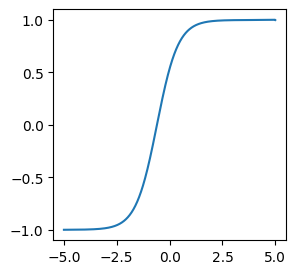

In [5]:
x, phi = kink_eq(dx=0.01, N=1000)
plt.figure(figsize=(3, 3))
plt.plot(x, phi)
plt.show()

## Kink solution at finite temperature: Langevin equation

In [6]:
def langevin_eq(N_pte, N_sta, T):
  # Code solves the Langevin equation by starting at zero configurations and
  # establishes after N_sta realizations. In our present case, N_sta = 8000.
  # The boundary conditions used are required to generate kinks solutions
  dtau = 0.001
  dx = 0.316

  Phi = np.zeros(N_pte) # initial Phi conf. with N size

  for n in range(0, N_sta):
    noise = np.random.normal(loc=0.0,scale=1.0,size=N_pte) # defines noise with N size
    for i in range(0, N_pte-1):
      Phi[0] = -0.999                                      # initial condition
      Phi[N_pte-1] = 0.999                                 # final condition
      Phi[i] = Phi[i] + (dtau/dx**2) * (Phi[i+1] - 2*Phi[i] + Phi[i-1] ) \
      - dtau * 2 * Phi[i] * (Phi[i]**2 -1) +  np.sqrt(2 * T * dtau) * noise[i]

  return Phi

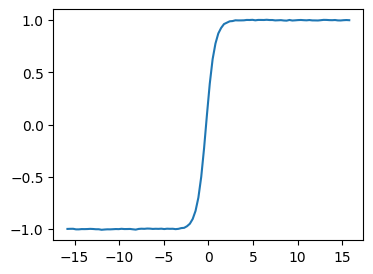

In [13]:
# Shows a configs
N_pte = 100
dx = 0.316
x_lattice= np.linspace(-N_pte*dx/2, N_pte*dx/2, N_pte) # N size

plt.figure(figsize=(4, 3))
plt.plot(x_lattice, langevin_eq(N_pte = 100, N_sta = 6000, T=0.0001))
# plt.plot(x_lattice, langevin_eq(N_pte = 100, N_sta = 6000, T=0.01))
plt.show()